In [155]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [183]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
import itertools
from scipy import interp
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [156]:
data = pd.read_csv('C:/Users/maxen/Downloads/data_v1.0.csv', usecols=range(2,13))

# Partie 1
## Exercice 1

In [157]:
data.isnull().sum()

date           91
cheveux       103
age            91
exp            96
salaire        95
sexe          100
diplome       110
specialite     93
note          114
dispo         106
embauche        0
dtype: int64

In [158]:
# On constate que les données ont été récupéréés sur 5 années durant
print(pd.to_datetime(data['date'], infer_datetime_format=True).min(),
pd.to_datetime(data['date'], infer_datetime_format=True).max())


2010-01-01 00:00:00 2014-12-31 00:00:00


In [159]:
data['year'] = pd.to_datetime(data['date'], infer_datetime_format=True).dt.year
data['month'] = pd.to_datetime(data['date'], infer_datetime_format=True).dt.month
data['day'] = pd.to_datetime(data['date'], infer_datetime_format=True).dt.day

In [160]:
print(data['year'].mean(), data['year'].median())
print(data['month'].mean(), data['month'].median())
print(data['day'].mean(), data['day'].median())

2012.0030137123913 2012.0
6.531920237078708 7.0
15.628610176302175 16.0


C:\Users\maxen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


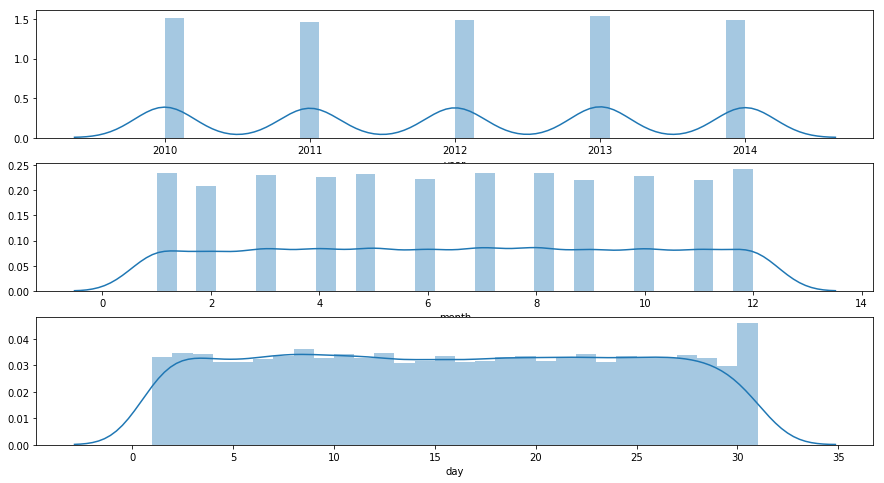

In [161]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.distplot(data['year'].dropna(), bins =30)
plt.subplot(312)
sns.distplot(data['month'].dropna(), bins =30)
plt.subplot(313)
sns.distplot(data['day'].dropna(), bins =30)
plt.show()

In [162]:
data['year'] = data['year'].fillna(data['year'].mode()[0])
data['month'] = data['month'].fillna(data['month'].mode()[0])
data['day'] = data['day'].fillna(data['day'].mode()[0])

C:\Users\maxen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


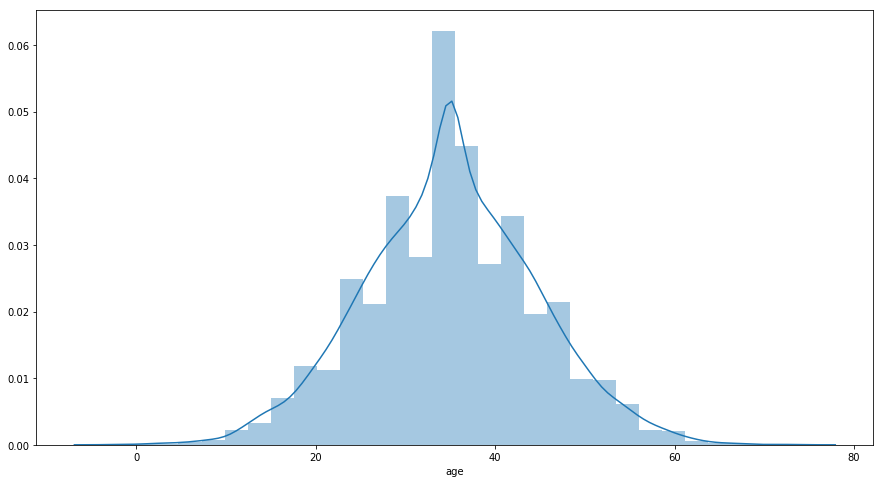

In [163]:
plt.figure(figsize=(15,8))
sns.distplot(data.age.dropna(), bins =30)
plt.show()

In [164]:
print(data.age.dropna().mean(), data.age.dropna().median(), data.age.dropna().mode())

35.00452056858707 35.0 0    35.0
dtype: float64


In [165]:
data['age'] = data['age'].fillna(35)

C:\Users\maxen\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


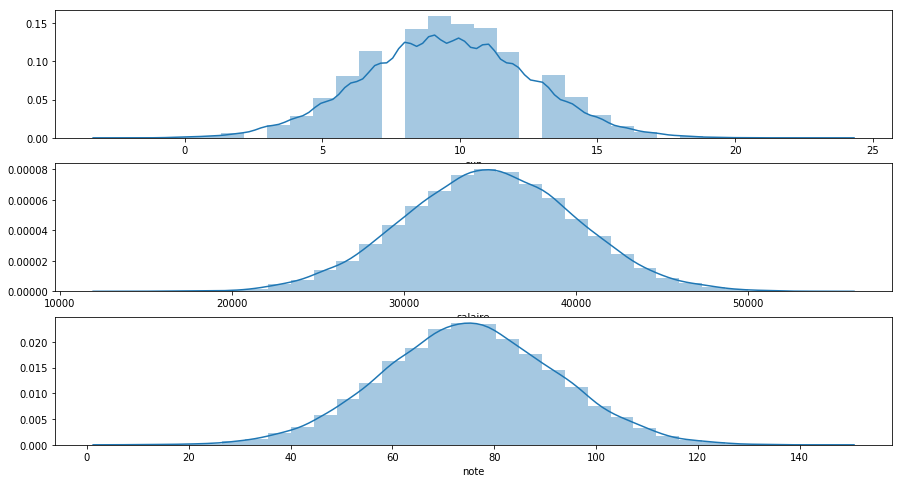

In [166]:
plt.figure(figsize=(15,8))
plt.subplot(311)
sns.distplot(data.exp.dropna(), bins =30)
plt.subplot(312)
sns.distplot(data.salaire.dropna(), bins =30)
plt.subplot(313)
sns.distplot(data.note.dropna(), bins =30)
plt.show()

In [167]:
data['exp'] = data['exp'].fillna(data['exp'].mean())
data['salaire'] = data['salaire'].fillna(data['salaire'].mean())
data['note'] = data['note'].fillna(data['note'].mean())

In [168]:
print(data.cheveux.value_counts(),
data.sexe.value_counts(),
data.diplome.value_counts(),
data.specialite.value_counts(),
data.dispo.value_counts(), sep ='\n')

chatain    6022
brun       5991
blond      5929
roux       1955
Name: cheveux, dtype: int64
M    11889
F     8011
Name: sexe, dtype: int64
master      7513
licence     7377
doctorat    2547
bac         2453
Name: diplome, dtype: int64
geologie       10028
forage          4340
detective       4155
archeologie     1384
Name: specialite, dtype: int64
non    11848
oui     8046
Name: dispo, dtype: int64


## Exercice 2
### Question a

In [169]:
import scipy.stats as ss
import numpy as np

#Création d'un  tableau croisé
crosstab = pd.crosstab(data.specialite, data.sexe, rownames=['specialite'], colnames=['sexe'])
  
#Test de cramer
def cramers(crosstab):
    chi2 = ss.chi2_contingency(crosstab)[0]
    n = crosstab.sum().sum()
    return np.sqrt(chi2 / (n*(min(crosstab.shape)-1)))
  
result = cramers(crosstab)
print(result)

0.36972941631623524


### Question b

In [170]:
data2 = data[data.index.isin(data['cheveux'].dropna().index)][['cheveux', 'salaire']]
data3 = pd.concat([pd.get_dummies(data2.cheveux), data2.salaire], axis = 1)

In [171]:
data3 = data3.dropna()

In [172]:
import statsmodels.api as sm

In [173]:
model = sm.OLS(endog=data3.salaire, exog=data3[['blond','brun','chatain', 'roux']]).fit()

In [174]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                salaire   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     29.52
Date:                Mon, 13 May 2019   Prob (F-statistic):           4.93e-19
Time:                        00:52:47   Log-Likelihood:            -1.9763e+05
No. Observations:               19897   AIC:                         3.953e+05
Df Residuals:                   19893   BIC:                         3.953e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
blond       3.467e+04     64.710    535.773      0.000    3.45e+04    3.48e+04
brun        3.503e+04     64.374    544.138      0.000    3.49e+04    3.52e+04
chatain     3.539e+04     64.208    551.244      0.000    3.53e+04    3.55e+04
roux        3.444e+04    112.691    305.573      0.000    3.42e+04    3.47e+04
==============================================================================
Omnibus:                        0.184   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.912   Jarque-Bera (JB):                0.167
Skew:                          -0.004   Prob(JB):                        0.920
Kurtosis:                       3.012   Cond. No.                         1.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Question c

In [175]:
data4 = data[['exp', 'note']].dropna()

In [176]:
model = sm.OLS(endog=data4.note, exog=data4.exp).fit()

In [177]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   note   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                 1.261e+05
Date:                Mon, 13 May 2019   Prob (F-statistic):               0.00
Time:                        00:52:48   Log-Likelihood:                -95390.
No. Observations:               20000   AIC:                         1.908e+05
Df Residuals:                   19999   BIC:                         1.908e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
exp            7.1864      0.020    355.076      0.000       7.147       7.226
==============================================================================
Omnibus:                        2.862   Durbin-Watson:                   1.878
Prob(Omnibus):                  0.239   Jarque-Bera (JB):                2.874
Skew:                          -0.023   Prob(JB):                        0.238
Kurtosis:                       2.964   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Partie 2
## Question 1

In [178]:
data = data.drop(['date', 'cheveux'], axis=1)

In [179]:
data.head()

,age,exp,salaire,sexe,diplome,specialite,note,dispo,embauche,year,month,day
0,25.0,9.0,26803.0,F,licence,geologie,97.08,non,0,2012.0,6.0,2.0
1,35.0,13.0,38166.0,M,licence,forage,63.86,non,0,2011.0,4.0,21.0
2,29.0,13.0,35207.0,M,licence,geologie,78.50,non,0,2012.0,9.0,7.0
3,35.0,12.0,32442.0,M,licence,geologie,45.09,non,0,2011.0,7.0,1.0
4,35.0,6.0,28533.0,F,licence,detective,81.91,non,0,2012.0,8.0,7.0


In [180]:
X = pd.concat([data[['age', 'exp', 'salaire','note', 'year', 'month', 'day']],
          pd.get_dummies(data['sexe']),
           pd.get_dummies(data['diplome']),
           pd.get_dummies(data['specialite']),
           pd.get_dummies(data['dispo'])
          ], axis=1)

In [182]:
y = data['embauche']

In [219]:
from sklearn.ensemble import RandomForestClassifier

# Data preparation

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=100, max_features=10, random_state=0)
forest.fit(X_train, y_train)

print("Exactitude sur jeu d'entraînement: {:.3f}".format(forest.score(X_train, y_train)))
print("Exactitude sur jeu de test: {:.3f}".format(forest.score(X_test, y_test)))

Exactitude sur jeu d'entraînement: 1.000
Exactitude sur jeu de test: 0.912


In [207]:
X.shape

(20000, 19)